**Luc Parat - Full Stack 2022**

Certification : Concepteur - Dévelopeur en Science des données

**Bloc 4 - Analyse prédictive de données non-structurées par l'intelligence artificielle**

Theme evaluation: Analyse de sentiment, par l'élaboration d'un algorithme permettant de déterminer le sentiment d'un utilisateur à l'égard d'un produit (avec possibilité de créer de la nouvelle donnée pour agrémenter la base). 

-----------

## **Natural Language Processing with Disaster Tweets**

**Predict which Tweets are about real disasters and which ones are not**

Welcome to one of our "Getting Started" competitions 👋

This particular challenge is perfect for data scientists looking to get started with Natural Language Processing. The competition dataset is not too big, and even if you don’t have much personal computing power, you can do all of the work in our free, no-setup, Jupyter Notebooks environment called Kaggle Notebooks.

Competition Description

Twitter has become an important communication channel in times of emergency.
The ubiquitousness of smartphones enables people to announce an emergency they’re observing in real-time. Because of this, more agencies are interested in programatically monitoring Twitter (i.e. disaster relief organizations and news agencies).

https://www.kaggle.com/c/nlp-getting-started

## **Word Embedding**

Nlp with disaster tweets 🔥

Projet - Real or Not? NLP with Disaster Tweets

----------

## Starting - Loading and checking dataset

In [39]:
# Import librairies
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

In [40]:
# Import with Pandas the classified dataset (with target).
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bloc_4/train.csv')
dataset

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [41]:
# Check missing value
dataset.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [42]:
# Check distribution (0 = not disaster, 1 = disaster)
dataset["target"].value_counts(normalize=True)*100

0    57.034021
1    42.965979
Name: target, dtype: float64

In [43]:
# Visualize distribution (0 = not disaster, 1 = disaster)
fig = px.bar(round(dataset["target"].value_counts(normalize=True)*100, 2),
            title = "Disaster tweet distribution",
            width=1000, height=500,)
fig.show()

##Preprocessing and Encoding

We will now run the preprocessing composed by several steps.

The goal is to clean up the character strings and encode the words so they are represented as integers in order to load it to the model.

In first we need to import Spacy to download language elements and English initialisation.

In [44]:
# Import librairies
import spacy

# Initialization
nlp = spacy.load('en_core_web_sm')

## Lemmatization

The goal is to keep the meaning of the words.

Lemmatization is the process of grouping together the inflected forms of a word so they can be analysed as a single item, identified by the word's lemma, or dictionary form.

Lemma (plural lemmas or lemmata) is the canonical form, dictionary form, or citation form of a set of word forms. For example, break, breaks, broke, broken and breaking are forms of the same lexeme, with break as the lemma by which they are indexed.

Inflected forms (inflexion) is a process of word formation in which a word is modified to express different grammatical categories such as person, number, gender, mood.... The inflection of verbs is called conjugation.

In [45]:
# Testing Lemmatization and extract the lemma using a comprehension list:
a=nlp("I leave her, I want to leave her, I left her, I let myself go")

# Checking what happened to the words in the sentence.
[element.lemma_ for element in a]

['I',
 'leave',
 'she',
 ',',
 'I',
 'want',
 'to',
 'leave',
 'she',
 ',',
 'I',
 'leave',
 'she',
 ',',
 'I',
 'let',
 'myself',
 'go']

##Stop Words

* Stop words are non-essential words. 
* Stop word removal is one of the most commonly used preprocessing steps across different NLP applications. 
* The idea is simply removing the words that occur commonly across all the documents in the corpus.
* Typically, articles and pronouns are generally classified as stop words.


In [46]:
from spacy.lang.en.stop_words import STOP_WORDS

In [47]:
# Testing STOP_WORDS and checking what happened to the sentence.
b = ("The world population was estimated by the United Nations to have exceeded 8 billion in November 2022.")

def remove_stop_words(b):
    b = ' '.join([c for c in b.split() if c not in STOP_WORDS])
    return b
remove_stop_words(b)

'The world population estimated United Nations exceeded 8 billion November 2022.'

## Text Cleaner

This cleaner function includes several functions in order to keep only the essential when using the texts as an inputs for the Model (algorithm).

In [48]:
# Define a function as a text cleaning tool
def cleaner_tool(text):
    #1 - remove punctuation
    text = ''.join([c for c in text if c not in r"[!\"#$%&()'ûª*+,-./:;<=>?@[\\\]^_`{|}~]+"])
    #2 - remove stopwords
    text = ' '.join([c for c in text.split() if c not in STOP_WORDS])
    #3 - remove numbers
    text = ''.join([c for c in text if not c.isdigit()])
    #4 - go to lowercase
    text = ' '.join(text.split()).lower()
    #5 - lemmatization
    text = ' '.join([c.lemma_ for c in nlp(text)])
    #6 - remove http
    text = ' '.join([c for c in text.split() if not c.startswith("http")])
    return text
    
# Sanity check
cleaner_tool("The world population was estimated by the United Nations to have exceeded 8 billion in November 2022. It took over 200,000 years of human prehistory and history for the human population to reach one billion and only 219 years more to reach 8 billion.[3]. https://en.wikipedia.org/wiki/World_population")

'the world population estimate united nations exceed billion november it take year human prehistory history human population reach billion year reach billion'

In [49]:
# Apply the cleaner tool to the text column and create a cleaned text column.
dataset["text_cleaned"] = dataset["text"].apply(cleaner_tool)
dataset.head()

,id,keyword,location,text,target,text_cleaned
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,our deed reason earthquake may allah forgive
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,all resident ask shelter place notify officer ...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive wildfire evacuation order calif...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,just got send photo ruby alaska smoke wildfire...


##Tokenizer

Tokenizer is the process for encoding the text.

Tokens are the building blocks of Natural Language.

Tokenization is a way of separating a piece of text into smaller units called tokens. Here, tokens can be either words, characters, or subwords. Hence, tokenization can be broadly classified into 3 types – word, character, and subword (n-gram characters) tokenization.

For example, consider the sentence: “Never give up”. The most common way of forming tokens is based on space. Assuming space as a delimiter, the tokenization of the sentence results in 3 tokens – Never-give-up. As each token is a word, it becomes an example of Word tokenization.

Similarly, tokens can be either characters or subwords. For example, let us consider “smarter”:

Character tokens: s-m-a-r-t-e-r
Subword tokens: smart-er

Tokenization is a key (and mandatory) aspect of working with text data

Using tf.keras.preprocessing.text.Tokenizer

In [50]:
# Import librairies
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [51]:
# Tokennizer configuration
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=10000, oov_token="OOV")
# num_words = number of words to keep in the vocabulary.
# Out-Of-Vocabulary (OOV) is a token that does not appear in vocabulary,
# OOV will replace any unknown words.

# Update/train the internal vocabulary
tokenizer.fit_on_texts(dataset['text_cleaned'])
# list all unique tokens in the text and associate them with a specific integer.

# Encoded
dataset["text_encoded"] = tokenizer.texts_to_sequences(dataset["text_cleaned"])
# transform the texts into sequences of indices

dataset

,id,keyword,location,text,target,text_cleaned,text_encoded
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,our deed reason earthquake may allah forgive,"[562, 3721, 463, 218, 867, 1345, 1795]"
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,"[158, 7, 202, 563, 5508, 5509, 1103]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,all resident ask shelter place notify officer ...,"[117, 1612, 510, 1796, 389, 5510, 356, 141, 22..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive wildfire evacuation order calif...,"[17, 2386, 105, 222, 342, 52]"
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,just got send photo ruby alaska smoke wildfire...,"[203, 306, 223, 162, 5511, 1797, 248, 105, 238..."
...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,two giant crane hold bridge collapse nearby home,"[291, 700, 1019, 385, 304, 57, 556, 36]"
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,ariaahrary thetawniest the control wild fire c...,"[5484, 5485, 3, 608, 272, 7, 52, 172, 233, 174..."
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,m utckm s volcano hawaii,"[8, 3480, 12, 471, 1334]"
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,police investigate ebike collided car little p...,"[35, 801, 2641, 2642, 60, 255, 4337, 2641, 162..."


In [52]:
# Checking vocabulary (10k words and indices)
tokenizer.index_word

{1: 'OOV',
 2: 'i',
 3: 'the',
 4: 'not',
 5: 'like',
 6: 'be',
 7: 'fire',
 8: 'm',
 9: 'do',
 10: 'a',
 11: 'amp',
 12: 's',
 13: 'new',
 14: 'you',
 15: 'go',
 16: 'in',
 17: 'people',
 18: 'news',
 19: 'get',
 20: 'to',
 21: 'burn',
 22: 'video',
 23: 'kill',
 24: 'bomb',
 25: 'crash',
 26: 'emergency',
 27: 'time',
 28: 'disaster',
 29: 'come',
 30: 'we',
 31: 'year',
 32: 'body',
 33: 'look',
 34: 'day',
 35: 'police',
 36: 'home',
 37: 'can',
 38: 'man',
 39: 'know',
 40: 'attack',
 41: 'family',
 42: 'flood',
 43: 'building',
 44: 'this',
 45: 'my',
 46: 'say',
 47: 'storm',
 48: 'good',
 49: 'think',
 50: 'love',
 51: 'train',
 52: 'california',
 53: 'watch',
 54: 'suicide',
 55: 'want',
 56: 'world',
 57: 'collapse',
 58: 'bag',
 59: 'scream',
 60: 'car',
 61: 'death',
 62: 'have',
 63: 'life',
 64: 'rt',
 65: 'and',
 66: 'pm',
 67: 'cause',
 68: 'that',
 69: 'he',
 70: 'what',
 71: 'work',
 72: 'need',
 73: 'nuclear',
 74: 'war',
 75: 'they',
 76: 'see',
 77: 'youtube',
 78:

##Padding
Now, after tokenizing the input sentences, we need to pad. 

Padding is basically to make all the input to same length for easier processing of the sentences.

As we know all the neural networks needs to have the inputs that should be in similar shape and size to be loadead to the Model. 

Note that not all the sequences have the same length, as we can say naturally some of the sequences are long in lengths and some are short.

At that time padding is necessary.

In [53]:
# Padding
reviews_pad = tf.keras.preprocessing.sequence.pad_sequences(dataset["text_encoded"], padding="post")
reviews_pad

array([[ 562, 3721,  463, ...,    0,    0,    0],
       [ 158,    7,  202, ...,    0,    0,    0],
       [ 117, 1612,  510, ...,    0,    0,    0],
       ...,
       [   8, 3480,   12, ...,    0,    0,    0],
       [  35,  801, 2641, ...,    0,    0,    0],
       [   3,  146,  112, ...,    0,    0,    0]], dtype=int32)

##Train test split

We will perform a train_test_split on the dataset (keeping 70% in the train). 

Before doing any preprocessing, let's put a little part (30%) of the dataset aside. This data will be refered to as the test set and won't be used to train the model.

Then need using .shuffle on the train set, and .batch on both sets to organise them by batches of 64 observations.

In [54]:
# Import librairies
from sklearn.model_selection import train_test_split

In [55]:
# Train/Test split
X_train, X_val, y_train, y_val = train_test_split(reviews_pad, dataset["target"], test_size=0.3)

# Create dataset with separate element for each row of the input tensor
train = tf.data.Dataset.from_tensor_slices((X_train, y_train))
val = tf.data.Dataset.from_tensor_slices((X_val, y_val))

# Create random batch
train_batch = train.shuffle(len(train)).batch(64)
val_batch = val.shuffle(len(val)).batch(64)

In [56]:
# Checking one batch
for review, star in train_batch.take(1):
  print(review, star)

tf.Tensor(
[[   2   57  885 ...    0    0    0]
 [6723    5  116 ...    0    0    0]
 [   6    4  111 ...    0    0    0]
 ...
 [  70  167   33 ...    0    0    0]
 [  13    1  308 ...    0    0    0]
 [   1 4234 2682 ...    0    0    0]], shape=(64, 28), dtype=int32) tf.Tensor(
[0 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0
 0 1 1 0 1 0 1 1 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 1 1 0 1], shape=(64,), dtype=int64)


## Configure the model/algorithm

Now that the text is properly encoded we can build the model for classifiying the texts. 

We'll build a very simple model for this task, since the goal is only to train the embedding layer.

Note that embedding is mapping the vocabulary space to a smaller representation space, so some words will become very similar vectors in the representation space, and other words will result in very different vectors. However what words become close and what words become distant does not depend on a general understanding of the language, the mapping is trained according to a supervised learning task.

In [57]:
# Import librairies
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout, SimpleRNN, GRU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint


* Hyperparameters are as follows: the size of the vocabulary is 10k words.
* Sequence Length is the length of the sequence of input data.
* We will treating predictions as a classification problem.
* This will affect the last layer and the choice of loss function and metric.
* A fully-connected formal neuron has p+1 parameters,
* p is the dimension of the input, and what gives it a non-linear behavior is the activation function.

In [58]:
# Vocabulary size
vocab_size = tokenizer.num_words #(=10k)

# Number of words in a sequence.
# sequence_length = 100

In [59]:
# Configure the model
model = tf.keras.Sequential([Embedding(input_dim=vocab_size+1, output_dim=8, input_shape=[review.shape[1],]), # Word Embedding layer
# input_dim: Integer. Size of the vocabulary + 1 (because of the zero padding)
# output_dim: Integer. Dimension of the dense embedding.
    tf.keras.layers.GlobalAveragePooling1D(), # this will pick the average for every word in the sentence
    tf.keras.layers.Dense(16, activation='relu'), # The rectified linear unit function (noted ReLu) for non linear function
    tf.keras.layers.Dense(1, activation='sigmoid')  # output prediction layer (0 or 1)
])

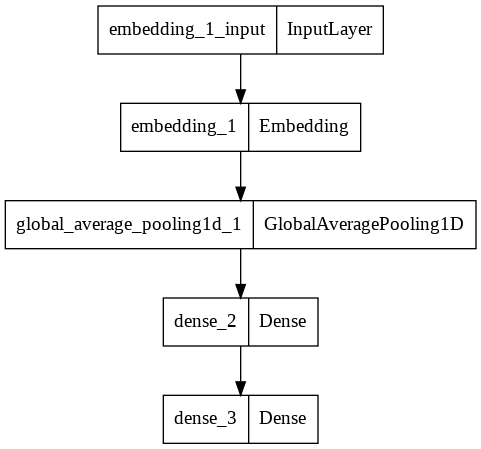

In [60]:
# Viewing the structure of the model (algorithm)
tf.keras.utils.plot_model(model)

##Compilation


Compiling a model is required to finalise the model and make it completely ready to use. 

For compilation, we need to specify an optimizer and a loss function.

In [61]:
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 28, 8)             80008     
                                                                 
 global_average_pooling1d_1   (None, 8)                0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_2 (Dense)             (None, 16)                144       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 80,169
Trainable params: 80,169
Non-trainable params: 0
_________________________________________________________________


##Checkpoint


ModelCheckpoint callback is used in conjunction with training to save a model or weights in a checkpoint file at some interval, so the model or weights can be loaded later to continue the training from the state saved.

In [62]:
checkpoint = ModelCheckpoint("/content/drive/MyDrive/Colab Notebooks/Bloc_4/model_luc.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto')

##Start the training

*   An epoch means training the neural network with all the training data for one cycle. 
*   In an epoch, we use all of the data exactly once. 
*   A forward pass and a backward pass together are counted as one pass: An epoch is made up of one or more batches, where we use a part of the dataset to train the neural network.
*   The training set is shuffled and split into several batches of a given size.
*   A first batch of data goes through the network (this is called the forward pass) and an output is formed for each of the observations in the batch.
*   The value of the loss function is computed by comparing every output with the target value.
*   The training stops when the desired number of epochs is achieved.
*   By the end of all this the neural network is trained and ready to make predictions !

In [63]:
# Training
history = model.fit(
    np.array(X_train), #convert to numpy
    np.array(y_train), #convert to numpy
    epochs=20, 
    batch_size=64,
    validation_data=(X_val, y_val),
    callbacks = [checkpoint])

Epoch 1/20
75/84 [=========================>....] - ETA: 0s - loss: 0.6870 - accuracy: 0.5660
Epoch 1: val_accuracy improved from -inf to 0.56042, saving model to /content/drive/MyDrive/Colab Notebooks/Bloc_4/model_luc.h5
84/84 [==============================] - 2s 13ms/step - loss: 0.6860 - accuracy: 0.5684 - val_loss: 0.6823 - val_accuracy: 0.5604
Epoch 2/20
82/84 [============================>.] - ETA: 0s - loss: 0.6712 - accuracy: 0.5745
Epoch 2: val_accuracy did not improve from 0.56042
84/84 [==============================] - 0s 5ms/step - loss: 0.6710 - accuracy: 0.5746 - val_loss: 0.6716 - val_accuracy: 0.5604
Epoch 3/20
73/84 [=========================>....] - ETA: 0s - loss: 0.6497 - accuracy: 0.5783
Epoch 3: val_accuracy improved from 0.56042 to 0.59764, saving model to /content/drive/MyDrive/Colab Notebooks/Bloc_4/model_luc.h5
84/84 [==============================] - 0s 5ms/step - loss: 0.6467 - accuracy: 0.5836 - val_loss: 0.6444 - val_accuracy: 0.5976
Epoch 4/20
72/84 [==

##Performance measurement

Using a loss function to determine how far the predicted values deviate from the actual values in the training data. 

Changing the model weights to make the loss minimum, and that is what training is all about.

The lower the loss, the better a model (unless the model has over-fitted to the training data). The loss is calculated on training and validation and its interperation is how well the model is doing for these two sets. 

Unlike accuracy, loss is not a percentage. It is a summation of the errors made for each example in training or validation sets.

In [64]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

,loss,accuracy,val_loss,val_accuracy
0,0.685974,0.568399,0.682257,0.560420
1,0.671043,0.574592,0.671551,0.560420
2,0.646721,0.583599,0.644418,0.597636
3,0.600915,0.676487,0.601654,0.683888
4,0.527941,0.780634,0.544652,0.757005


In [65]:
# Viewing loss & accuracy scores
fig = go.Figure(data=[
                      go.Scatter(
                          y=history.history["loss"],
                          name="loss",
                          mode="lines",),
                      go.Scatter(
                          y=history.history["val_loss"],
                          name="val_loss",
                          mode="lines"),
                      go.Scatter(
                          y=history.history["accuracy"],
                          name="accuracy",
                          mode="lines",),
                      go.Scatter(
                          y=history.history["val_accuracy"],
                          name="val_accuracy",
                          mode="lines")
])
fig.update_layout(
    title='Loss & Accuracy by Epoch',
    xaxis_title='epochs',
    yaxis_title='',
    yaxis=dict(range=[0, 1]))

# The model is good because the loss underfit and accuracy overfit

##Testing the model

Now I will load the model saved into the checkpoint file and test it with tweets below

In [66]:
# Loading the model
model = tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/Bloc_4/model_luc.h5")

In [67]:
text_for_testing = [
"Just happened a terrible car crash",
"Heard about #earthquake is different cities, stay safe everyone.",
"there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all",
"Apocalypse lighting. #Spokane #wildfires",
"Typhoon Soudelor kills 28 in China and Taiwan",
"We're shaking...It's an earthquake",
"They'd probably still show more life than Arsenal did yesterday, eh? EH?",
"Hey! How are you?",
"What a nice hat?",
"Fuck off!",
"No I don't like cold!",
"NOOOOOOOOO! Don't do that!",
"No don't tell me that!",
"What if?!",
"Awesome!",
"Birmingham Wholesale Market is ablaze BBC News - Fire breaks out at Birmingham's Wholesale Market http://t.co/irWqCEZWEU",
"@sunkxssedharry will you wear shorts for race ablaze ?",
"#PreviouslyOnDoyinTv: Toke MakinwaÛªs marriage crisis sets Nigerian Twitter ablaze... http://t.co/CMghxBa2XI",
"Check these out: http://t.co/rOI2NSmEJJ http://t.co/3Tj8ZjiN21 http://t.co/YDUiXEfIpE http://t.co/LxTjc87KLS #nsfw",
]

In [68]:
# Testing session with text_for_testing

for i in text_for_testing:
    i = cleaner_tool(i)
    
    tokenized = tokenizer.texts_to_sequences([i])
    reviews_pad_test = pad_sequences(tokenized, maxlen=28)
    prediction = round(model.predict(np.array(reviews_pad_test))[0][0])
    percent = round((model.predict(np.array(reviews_pad_test))[0][0])*100, 2)

    print (f" {i} ==> disaster probability = {percent}%")

1/1 [==============================] - 0s 20ms/step
 just happen terrible car crash ==> disaster probability = 76.42%
1/1 [==============================] - 0s 20ms/step
 hear earthquake different city stay safe ==> disaster probability = 64.72%
1/1 [==============================] - 0s 20ms/step
 forest fire spot pond geese flee street I save ==> disaster probability = 83.12%
1/1 [==============================] - 0s 20ms/step
 apocalypse lighting spokane wildfire ==> disaster probability = 60.17%
1/1 [==============================] - 0s 23ms/step
 typhoon soudelor kill china taiwan ==> disaster probability = 93.43%
1/1 [==============================] - 0s 21ms/step
 be shakingit earthquake ==> disaster probability = 48.08%
1/1 [==============================] - 0s 23ms/step
 they d probably life arsenal yesterday eh eh ==> disaster probability = 13.33%
1/1 [==============================] - 0s 19ms/step
 hey how ==> disaster probability = 13.11%
1/1 [==============================]

## Last part : using the model with the second dataset no classified (without target)

I built a machine learning model that predicts which Tweets are about real disasters and which are not.

Now, I will use my model on the second dataset that is not classified to predict what concerns real disasters or not, then I will export the predictions in csv format for the purposes of the kaggle competition.

In [69]:
# Import with Pandas the second dataset (no classified)
second_dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bloc_4/test.csv')
second_dataset

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [70]:
# Apply the cleaner tool to the text column and create a cleaned text column.
second_dataset["text_cleaned"] = second_dataset["text"].apply(cleaner_tool)
second_dataset

,id,keyword,location,text,text_cleaned
0,0,NaN,NaN,Just happened a terrible car crash,just happen terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...",hear earthquake different city stay safe
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...",forest fire spot pond geese flee street I save
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,apocalypse lighting spokane wildfire
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,typhoon soudelor kill china taiwan
...,...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,earthquake safety los angeles ûò safety fasten...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...,storm ri bad hurricane my cityampother hard hi...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...,green line derailment chicago
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...,meg issue hazardous weather outlook hwo


In [71]:
# Configuration of the prediction function 
def disaster_or_not(text):
    tokenized = tokenizer.texts_to_sequences([text])
    reviews_pad_test = pad_sequences(tokenized, maxlen=28)
    return round(model.predict(np.array(reviews_pad_test))[0][0])

In [72]:
# Run predictions
second_dataset["target"] = second_dataset["text_cleaned"].apply(disaster_or_not)

1/1 [==============================] - 0s 36ms/step


,id,keyword,location,text,text_cleaned,target
0,0,NaN,NaN,Just happened a terrible car crash,just happen terrible car crash,1
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...",hear earthquake different city stay safe,1
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...",forest fire spot pond geese flee street I save,1
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,apocalypse lighting spokane wildfire,1
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,typhoon soudelor kill china taiwan,1
...,...,...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,earthquake safety los angeles ûò safety fasten...,1
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...,storm ri bad hurricane my cityampother hard hi...,1
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...,green line derailment chicago,1
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...,meg issue hazardous weather outlook hwo,1


In [73]:
# Check distribution (0 = not disaster, 1 = disaster)
second_dataset["target"].value_counts(normalize=True)*100

0    64.725713
1    35.274287
Name: target, dtype: float64

In [74]:
# Sanity check
second_dataset

,id,keyword,location,text,text_cleaned,target
0,0,NaN,NaN,Just happened a terrible car crash,just happen terrible car crash,1
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...",hear earthquake different city stay safe,1
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...",forest fire spot pond geese flee street I save,1
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,apocalypse lighting spokane wildfire,1
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,typhoon soudelor kill china taiwan,1
...,...,...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,earthquake safety los angeles ûò safety fasten...,1
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...,storm ri bad hurricane my cityampother hard hi...,1
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...,green line derailment chicago,1
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...,meg issue hazardous weather outlook hwo,1


# Run csv file to submit for the Kaggle challenge

In [75]:
# The submission for the kaggle challenge should be a CSV file with 3263 rows and a header. 
kaggle_challenge = second_dataset[["id", "target"]]
kaggle_challenge.to_csv("/content/drive/MyDrive/Colab Notebooks/Bloc_4/disaster_tweet_challenge_LP.csv", index=False, header=True)

__________

By Luc Parat 😎 2022/12

lucparat1@gmail.com